In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import json
import pickle


# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#from utils.utils_bouts import NameCat,NameCatSym
from classification.template_bouts import Knn_Training_Dataset
from utils.utils_bouts import NameCat



# Load all bouts

In [8]:

folder = 'G://Megabouts_dataset//Full_Tracking_Pipeline//'
file_list=[]
for file in os.listdir(folder):
    if file.endswith(".pickle"):
        file_list.append(os.path.join(folder, file))
        
N = 25000*len(file_list)
tail_and_traj_array_all_fish = np.zeros((N,10,140))
bout_cat_all_fish = np.zeros(N)

i = 0
for i_f,filename in enumerate(file_list):
    
    print(i_f)
    with open(filename, 'rb') as handle:
                pipeline_results = pickle.load(handle)
                
                
    pipeline = pipeline_results['pipeline']

    tail_and_traj_array = pipeline['tail_and_traj_array']
    bout_cat = pipeline['bout_cat']
    n = len(bout_cat)

    tail_and_traj_array_all_fish[i:i+n,:,:] = tail_and_traj_array
    bout_cat_all_fish[i:i+n] = bout_cat
    i = i+n
    
tail_and_traj_array_all_fish = tail_and_traj_array_all_fish[:i]
bout_cat_all_fish = bout_cat_all_fish[:i]

0


KeyboardInterrupt: 

In [3]:
#np.savez('All_free_swimming_bouts.npz', tail_and_traj_array_all_fish, bout_cat_all_fish)

In [3]:
file_ = np.load('All_free_swimming_bouts.npz')
tail_and_traj_array_all_fish = file_['arr_0']
bout_cat_all_fish = file_['arr_1']
# Flatten Matrix:
bout_cat = bout_cat_all_fish
tail_and_traj_array_flat = np.reshape(tail_and_traj_array_all_fish,(tail_and_traj_array_all_fish.shape[0],
                                                                    tail_and_traj_array_all_fish.shape[1]*tail_and_traj_array_all_fish.shape[2]))

tail_array_flat = tail_and_traj_array_flat[:,0:140*7]

In [4]:
print(len(bout_cat))

1964926


# Load Head Restrained bouts:

In [5]:
folder = 'G://Megabouts_dataset//Head_Restrained_Pipeline//'
file_list=[]
for file in os.listdir(folder):
    if file.endswith(".pickle"):
        file_list.append(os.path.join(folder, file))
        
N = 25000*len(file_list)
tail_array_HR_fish = np.zeros((N,7,140))
bout_cat_HR_fish = np.zeros(N)

i = 0
for i_f,filename in enumerate(file_list):
    
    print(i_f)
    with open(filename, 'rb') as handle:
                pipeline_results = pickle.load(handle)
                   
    pipeline = pipeline_results['pipeline']

    tail_array = pipeline['tail_array']
    bout_cat_ = pipeline['bout_cat']
    n = len(bout_cat_)

    tail_array_HR_fish[i:i+n,:,:] = tail_array
    bout_cat_HR_fish[i:i+n] = bout_cat_
    i = i+n
    
tail_array_HR_fish = tail_array_HR_fish[:i]
bout_cat_HR_fish = bout_cat_HR_fish[:i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


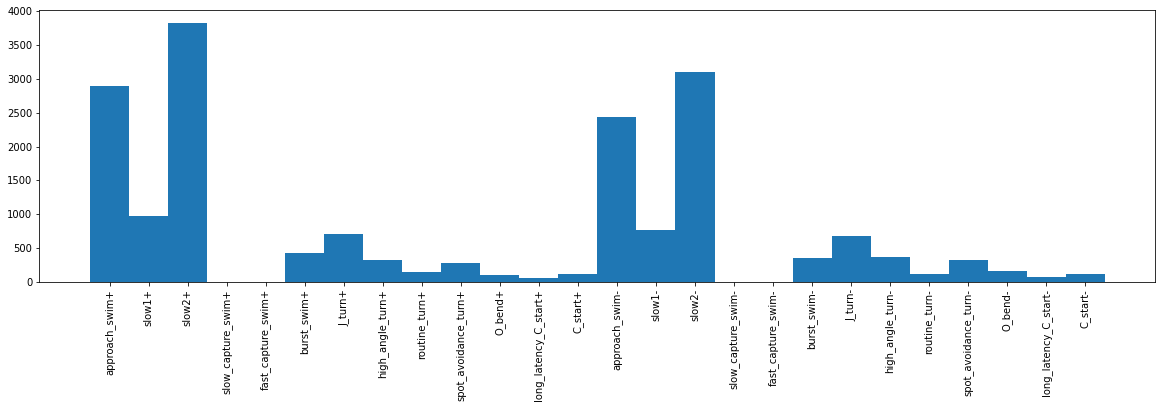

In [6]:
fig, ax = plt.subplots(facecolor='white',figsize=(20,5)) 
plt.hist(bout_cat_HR_fish,np.linspace(-0.5,25.5,27))
plt.xticks(np.arange(26),NameCat, rotation='vertical')
plt.show()

# UMAP + Classification => Find outlier cluster

# Compute distance to nearest ref bouts for each category

In [10]:
from classification.template_bouts import Knn_Training_Dataset
from classification.classify import bouts_classifier
from pipeline.cfg import ConfigTailSegmentationClassification


In [11]:
cfg_segment_classify = ConfigTailSegmentationClassification(fps=700,
                                                            min_code_height=1,min_spike_dist_ms=120,
                                                            margin_before_peak_ms=32,
                                                            bout_duration_ms=200,
                                                            augment_max_delay_ms=18,
                                                            augment_step_delay_ms=2,
                                                            feature_weight=np.ones(7),
                                                            N_kNN=10)

In [12]:
knn_training_dataset_augmented = Knn_Training_Dataset(fps=cfg_segment_classify.fps,
                                                         augmentation_delays=np.arange(0,
                                                                                        cfg_segment_classify.augment_max_delay,
                                                                                        cfg_segment_classify.augment_step_delay),
                                                         ignore_CS=True)

(1964926, 7, 140)


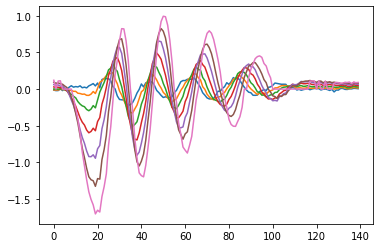

In [15]:
tail_and_traj_array_all_fish.shape
X = tail_and_traj_array_all_fish[:,:7,:]
print(X.shape)
plt.plot(X[0,:,:].T)

In [17]:
bout_category,onset_delay,id_nearest_template = bouts_classifier(X,
                                                                kNN_training_dataset=knn_training_dataset_augmented,
                                                                weight= cfg_segment_classify.feature_weight,
                                                                n_neighbors= cfg_segment_classify.N_kNN,
                                                                tracking_method='tail')

KeyboardInterrupt: 